In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

In [2]:
penguins_df = pd.read_csv('COMP472-A1-datasets/penguins.csv')
# print(penguins_df.head())

In [3]:
# print csv file info
print(penguins_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB
None


In [4]:
# label encoding string values to int
le = preprocessing.LabelEncoder()
penguins_df['island'] = le.fit_transform(penguins_df['island'])
penguins_df['sex'] = le.fit_transform(penguins_df['sex'])
penguins_df['species'] = le.fit_transform(penguins_df['species'])

# print(penguins_df.info()) 
# print(penguins_df.head())

In [5]:
# converting the features into 1-hot vectors
# penguins_df = pd.get_dummies(penguins_df, columns=['species'], prefix='species', dtype='int64')
# penguins_df = pd.get_dummies(penguins_df, columns=['sex'], prefix='sex', dtype='int64')
# penguins_df = pd.get_dummies(penguins_df, columns=['island'], prefix='island', dtype='int64')

# print(penguins_df.info()) 
# print(penguins_df.head())

# Note we've left this commented out to not affect columns of the table being used for the rest of the results


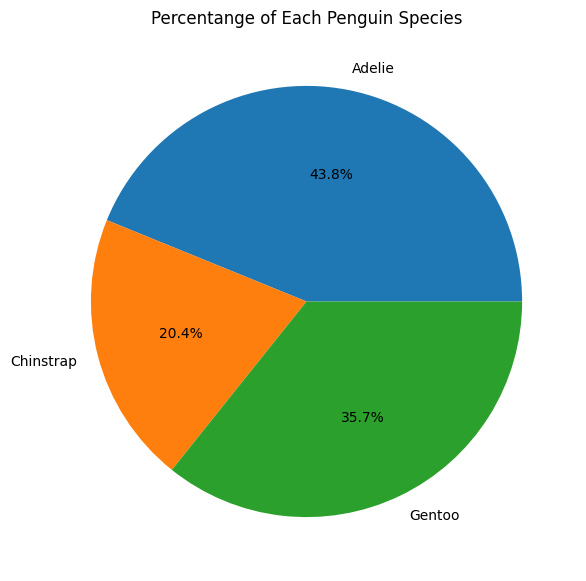

In [6]:
# plot pie chart based on output class species
total = penguins_df['species'].count()

num_adelie = penguins_df[penguins_df['species'] == 0]['species'].count()
percent_adelie = num_adelie / total * 100

num_chinstrap = penguins_df[penguins_df['species'] == 1]['species'].count()
percent_chinstrap = num_chinstrap / total * 100

num_gentoo = penguins_df[penguins_df['species'] == 2]['species'].count()
percent_gentoo = num_gentoo / total * 100

species_percentages = [percent_adelie, percent_chinstrap, percent_gentoo]

plt.figure(figsize=(7, 7))
plt.pie(species_percentages, labels=['Adelie', 'Chinstrap', 'Gentoo'], autopct='%1.1f%%')
plt.title("Percentange of Each Penguin Species")
plt.savefig('penguins_species_pie_chart.png')

plt.show()

# Note: dataset is not balanced as there are more almost twice as many data instances of Adelie as Chinstraps, likely creating a bias towards Adelie
# Adeli: 43.8% 
# Gentoo: 35.7%
# Chinstrap: 20.4%

# imbalanced dataset : f1 score

In [7]:
# split data into training and testing sets
# default split is 25% testing, 75% training
# data is shuffled by default, but no seeding applied 

X, y = [penguins_df.drop('species', axis=1), penguins_df['species']]

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y)

Base-DT: a decision tree with the default parameters 

'penguin_species_base_dt.pdf'

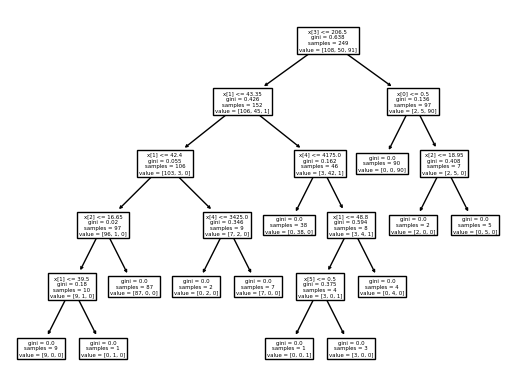

In [8]:
# default parameter for criterion = Gini impurity 
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train_set, y_train_set)
tree.plot_tree(dtc)

dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names= ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_grams', 'sex'],
    class_names=['Adelie','Chinstrap','Gentoo'],
    filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 

graph.render("penguin_species_base_dt")   # save to pdf

In [10]:
y_predict = dtc.predict(X_test_set)

print(le.classes_)
# le.inverse_transform(y_predict)

# print(X_test_set)
# print("Predicted output: ", y_predict)

['FEMALE' 'MALE']


Top-DT: a Decision Tree found using a gridsearch 

Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters

Top-MLP: a Multi-Layered Perceptron found using grid search